In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import h5py 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Load dataset

In [2]:
train_dataset = h5py.File('../Datasets/CarModPow/ml_data_MLP/all_CarMod_data.h5', "r")
print(train_dataset)
train_set_x_orig = np.array(train_dataset["data_CarMod_x"][:]) # your train set features
train_set_y_orig = np.ravel(np.array(train_dataset["data_label_y"][:])) # your train set labels

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(train_set_x_orig)
train_set_x_norm = minmax_scaler.transform(train_set_x_orig)

X_train, X_test, y_train, y_test = train_test_split(train_set_x_norm, train_set_y_orig,test_size=0.25, random_state=1)
print(f"Type: X_train={type(X_train)}, y_train={type(y_train)}")
print(f"Shapes: X_train={X_train.shape}, y_train={y_train.shape}, X_test={X_test.shape}, y_test={y_test.shape}")

unq_vals, unq_counts = np.unique(y_train, return_counts=True)
print(dict(zip(unq_vals,unq_counts)))
# print(X_train)


<HDF5 file "all_CarMod_data.h5" (mode r)>
Type: X_train=<class 'numpy.ndarray'>, y_train=<class 'numpy.ndarray'>
Shapes: X_train=(1203, 603), y_train=(1203,), X_test=(402, 603), y_test=(402,)
{0: 327, 1: 191, 2: 285, 3: 328, 4: 72}


Model #1: An SVM model (rbf kernels seem to work the best)

Unique values in y_test_pred=[0 1 2 3 4]
Unique values in y_train=[0 1 2 3 4]
Training accuracy=0.9850374064837906
 Testing accuracy=0.9676616915422885



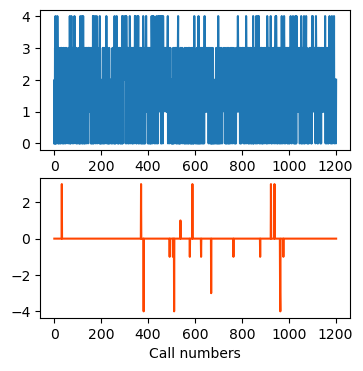

In [4]:
svm_model = svm.SVC(kernel='rbf').fit(X_train, y_train)
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

print(f"Unique values in y_test_pred={np.unique(y_test_pred)}")
print(f"Unique values in y_train={np.unique(y_train)}")

fig, ax = plt.subplots(2,1,figsize=(4,4))
ax[0].plot(y_train)
ax[1].plot(y_train-y_train_pred, color = "orangered")
ax[1].set_xlabel("Call numbers")

print(f"Training accuracy={np.sum(y_train==y_train_pred)/len(y_train_pred)}\n Testing accuracy={np.sum(y_test==y_test_pred)/len(y_test_pred)}\n")

Train a fully connected NN followed by a softmax

In [12]:
tf.random.set_seed(1234)  # applied to achieve consistent results

# Define the model 
NNmodel = Sequential(
    [
        Dense(10, activation = 'relu',   name = "L1"),
        Dense(5, activation = 'linear', name = "L2")
    ]
)

# Compile the model 
NNmodel.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

# Fit the model 
NNmodel.fit(
    X_train,y_train,
    epochs=200
)

Epoch 1/200
38/38 [==============================] - 0s 3ms/step - loss: 0.6108
Epoch 2/200
38/38 [==============================] - 0s 3ms/step - loss: 0.1646
Epoch 3/200
38/38 [==============================] - 0s 5ms/step - loss: 0.1241
Epoch 4/200
38/38 [==============================] - 0s 2ms/step - loss: 0.0908
Epoch 5/200
38/38 [==============================] - 0s 2ms/step - loss: 0.0795
Epoch 6/200
38/38 [==============================] - 0s 2ms/step - loss: 0.0711
Epoch 7/200
38/38 [==============================] - 0s 2ms/step - loss: 0.0606
Epoch 8/200
38/38 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 9/200
38/38 [==============================] - 0s 2ms/step - loss: 0.0554
Epoch 10/200
38/38 [==============================] - 0s 2ms/step - loss: 0.0424
Epoch 11/200
38/38 [==============================] - 0s 2ms/step - loss: 0.0626
Epoch 12/200
38/38 [==============================] - 0s 2ms/step - loss: 0.0768
Epoch 13/200
38/38 [=================

Check output of NN model 

13/13 [==============================] - 0s 1ms/step
Unique values in y_train=[0 1 2 3 4]
Unique values in y_test_pred=[0 1 2 3 4]
Training accuracy=1.0
 Testing accuracy=0.9776119402985075



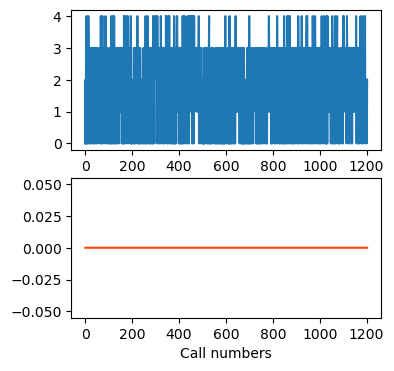

In [13]:
y_train_pred_NN = np.argmax(NNmodel.predict(X_train), axis=1)
y_test_pred_NN = np.argmax(NNmodel.predict(X_test), axis=1)

print(f"Unique values in y_train={np.unique(y_train_pred_NN)}")
print(f"Unique values in y_test_pred={np.unique(y_test_pred_NN)}")

fig, ax = plt.subplots(2,1,figsize=(4,4))
ax[0].plot(y_train)
ax[1].plot(y_train-y_train_pred_NN, color = "orangered")
ax[1].set_xlabel("Call numbers")

print(f"Training accuracy={np.sum(y_train==y_train_pred_NN)/len(y_train)}\n Testing accuracy={np.sum(y_test==y_test_pred_NN)/len(y_test)}\n")